In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import measurements
from scipy.signal import convolve2d
from skimage.measure import perimeter
from skimage.draw import circle

import scipy.io

In [20]:
def generate_germs(x,y):
    x_min, x_max = 0, x
    y_min, y_max = 0, y
    
    lambd = 100/(500*500)
    area = x*y
    
    n_points = np.random.poisson(lambd * area)
    
    X = x_min + (x_max-x_min)*np.random.rand(n_points)
    Y = y_min + (y_max-y_min)*np.random.rand(n_points)
    
    plt.scatter(X,Y)
    return X,Y

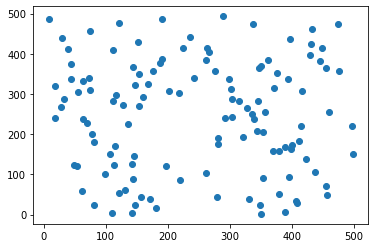

In [22]:
X,Y = generate_germs(500,500)

In [95]:
def generate_grains(X, Y):
    plt.figure()
    plt.scatter(X,Y)
    assert(len(X)==len(Y))
    
    X = np.floor(X)
    Y = np.floor(Y)
    
    image = np.zeros((500,500))
    raios = []
    
    for i in range(len(X)):
        radius = np.random.randint(10,51)
        raios.append(radius)
        rr,cc = circle(Y[i], X[i], radius)
        #print("rr, cc", rr, "  ", cc, end="\n\n")
        
        try:
            image[rr,cc] = 1
        except:
            continue
            
    plt.imshow(image)
    return image, raios

<ipython-input-95-1a17a95698f2>:15: FutureWarning: `draw.circle` is deprecated in favor of `draw.disk`.`draw.circle` will be removed in version 0.19
  rr,cc = circle(Y[i], X[i], radius)


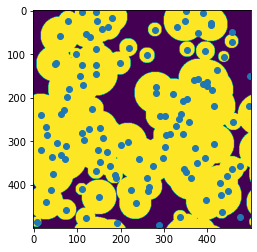

In [96]:
image, rayons = generate_grains(X,Y)

In [97]:
image = image.astype('uint8')

In [98]:
def final(n_iter):


    mask = np.array([[0,0,0],
                     [0,1,4],
                     [0,2,8]])
    
    A, P, χ4, χ8 = [], [], [], []
    
    
    for i in range(n_iter):

        conv = convolve2d(image, mask, mode='same')
        #print(conv)

        x_axis = np.arange(0,17,1)

        h, x = np.histogram(conv[:], bins=x_axis)

        #plt.bar(x[0:-1], h)

        arr_f_intra = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
        arr_e_intra = [0, 2, 1, 2, 1, 2, 2, 2 ,0, 2, 1, 2, 1, 2, 2, 2]
        arr_v_intra = [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

        arr_f_inter = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
        arr_e_inter = [0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 1, 0, 1, 0, 2]
        arr_v_inter = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]

        v_intra = arr_v_intra@h
        e_intra = arr_e_intra@h
        f_intra = arr_f_intra@h

        v_inter = arr_v_inter@h
        e_inter = arr_e_inter@h
        f_inter = arr_f_inter@h

        A.append(f_intra)
        P.append(-4*f_intra + 2*e_intra)
        χ8.append(v_intra - e_intra + f_intra)
        χ4.append(v_inter - e_inter + f_inter)
        
    return A, P, χ4, χ8 


#print("A  = %d\nP  = %d\nχ8 = %d\nχ4 = %d"%(A, P , χ8, χ4))

In [107]:
A, P, χ4, χ8 = final(100)

A = np.mean(A)
P = np.mean(P)
χ4 = np.mean(χ4)

W0_bar = A/(500*500)
W1_bar = P/(2*500*500)
W2_bar = χ4*np.pi/(500*500)

print("W0_bar  = %f\nW1_bar  = %f\nW2_bar  = %f"%(W0_bar, W1_bar , W2_bar))

W0_bar  = 0.757700
W1_bar  = 0.010992
W2_bar  = 0.000013


In [112]:
W0_x = 100/(500*500) * ( np.var(rayons) - (np.mean(rayons)**2))

In [114]:
# Errors

W0_test = 1-(np.e**(W0_x))
print(W0_bar - W0_test)
#print(W1_bar - W1_z)
#print(W2_bar - W2_z)

print("\n-------------------\n")


print((W0_bar - W0_test)/W0_bar)
#print((W1_bar - W1_z)/W1_bar)
#print((W2_bar - W2_z)/W2_bar)

0.49044548007864297

-------------------

0.6472818794755747
